**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

**Analyze and clean the data**
**How many rows and columns and which data types?**

In [2]:
df = pd.read_csv("german_credit_data.csv")
print(df.shape)

(1000, 10)


In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
columns = df.columns
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration 

In [6]:
print(pd.isnull(df).any())

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool


Features "Saving accounts" and "Checking account" contain null values(NaN). That's why SimpleImputer is used to replace this missing values by the most frequent ones

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["Saving accounts", "Checking account"]] = imp.fit_transform(df[["Saving accounts", "Checking account"]])
df_original = df.copy()

**Encode and normalize the data**

In [8]:
columns_to_encode = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
print(df)

     Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0             0   67    1    2        1                0                 0   
1             1   22    0    2        1                0                 1   
2             2   49    1    1        1                0                 0   
3             3   45    1    2        0                0                 0   
4             4   53    1    2        0                0                 0   
..          ...  ...  ...  ...      ...              ...               ...   
995         995   31    0    1        1                0                 0   
996         996   40    1    3        1                0                 0   
997         997   38    1    2        1                0                 0   
998         998   23    1    2        0                0                 0   
999         999   27    1    2        1                1                 1   

     Credit amount  Duration  Purpose  
0             1169     

**Perform PCA and t-sne to visualize data**

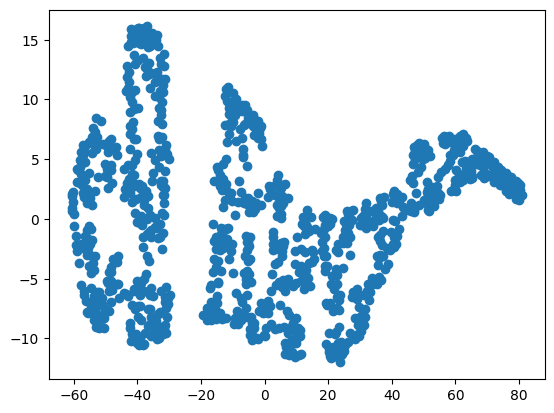

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df)
plt.scatter([feature[0] for feature in df_tsne], [feature[1] for feature in df_tsne])

From the following analysis, we can conclude that the possible amount of clusters for this dataset is 2

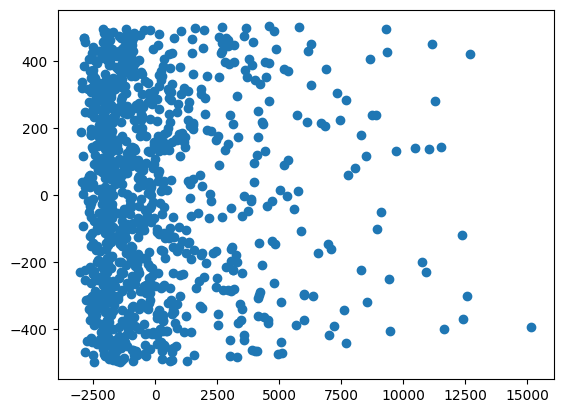

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter([feature[0] for feature in df_pca], [feature[1] for feature in df_pca])

**Find clusters by using k-means, Hierachical Clustering, and DBSCAN**

KMeans

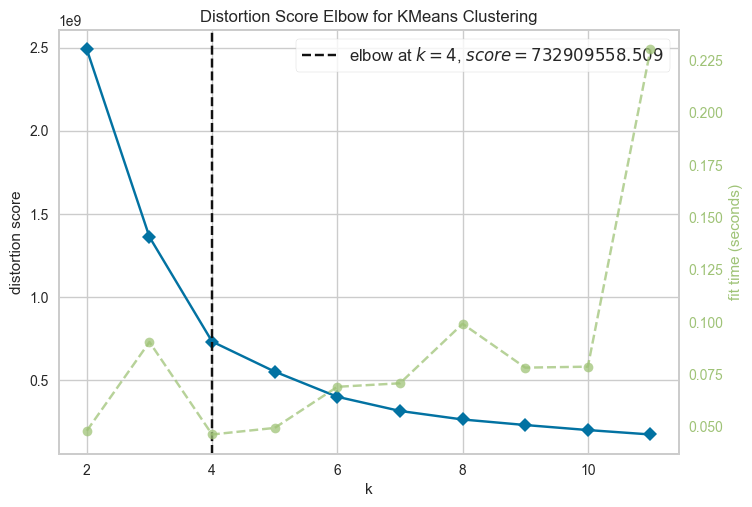

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df)
visualizer.show()

In terms of Elbow method, 4 - is the recommended number of clusters for the given dataset

In [12]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for clusters in range(2, 10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans_prediction = kmeans.fit_predict(df)
    silhouette_list.append(silhouette_score(df, kmeans_prediction))
print(silhouette_list)

[0.7075495991438223, 0.6243121329109657, 0.5627381519140524, 0.5225709028118192, 0.4878114412873791, 0.4812258662783982, 0.43982152718235695, 0.4584101581703659]


However, in terms of Silhouette score, the recommended number of clusters = 2

In [13]:
clusters2_prediction = KMeans(n_clusters=2).fit_predict(df)
clusters4_prediction = KMeans(n_clusters=4).fit_predict(df)

In [14]:
def simple_print(prediction):
    feature1 = [feature[0] for feature in df_tsne]
    feature2 = [feature[1] for feature in df_tsne]
    colors = ['red', 'blue', 'pink', 'black', 'yellow']
    for point_index in range(df.shape[0]):
        plt.scatter(feature1[point_index], feature2[point_index], color=colors[prediction[point_index]])

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cluster1 = []
cluster2 = []
for index in range(df.shape[0]):
    if clusters2_prediction[index] == 0:
        cluster1.append(df_original.iloc[index, :].values)
    else:
        cluster2.append(df_original.iloc[index, :].values)
cluster1 = pd.DataFrame(cluster1, columns=columns)
cluster2 = pd.DataFrame(cluster2, columns=columns)


In [16]:
cluster1.describe()


,Unnamed: 0,Age,Job,Credit amount,Duration
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,487.354286,36.828571,2.234286,8388.508571,34.777143
std,310.923005,11.284935,0.675492,2712.279632,13.713889
min,1.000000,21.000000,0.000000,5293.000000,6.000000
25%,206.500000,28.000000,2.000000,6355.500000,24.000000
50%,501.000000,35.000000,2.000000,7476.000000,36.000000
75%,781.000000,43.500000,3.000000,9569.000000,48.000000
max,988.000000,75.000000,3.000000,18424.000000,72.000000


In [17]:
print(cluster1)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             1   22  female    2     own          little         moderate   
1             3   45    male    2    free          little           little   
2             5   35    male    1    free          little           little   
3             7   35    male    3    rent          little         moderate   
4            17   25    male    2     own          little           little   
5            18   44  female    3    free          little         moderate   
6            29   63    male    2     own          little           little   
7            32   30    male    2     own        moderate         moderate   
8            36   31    male    2    free          little           little   
9            42   44    male    1     own          little         moderate   
10           43   24    male    2    rent        moderate           little   
11           44   58  female    1    free          little       

In [18]:
cluster2.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,825.000000,825.000000,825.000000,825.000000,825.00000
mean,502.076364,35.273939,1.833939,2185.780606,17.96000
std,284.043353,11.382797,0.627301,1168.556300,9.32905
min,0.000000,19.000000,0.000000,250.000000,4.00000
25%,256.000000,26.000000,2.000000,1275.000000,12.00000
50%,499.000000,33.000000,2.000000,1935.000000,15.00000
75%,745.000000,41.000000,2.000000,2993.000000,24.00000
max,999.000000,75.000000,3.000000,5248.000000,48.00000


In [19]:
print(cluster2.head())

   Unnamed: 0  Age   Sex  Job Housing Saving accounts Checking account  \
0           0   67  male    2     own          little           little   
1           2   49  male    1     own          little           little   
2           4   53  male    2    free          little           little   
3           6   53  male    2     own      quite rich           little   
4           8   61  male    1     own            rich           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           2096        12            education  
2           4870        24                  car  
3           2835        24  furniture/equipment  
4           3059        12             radio/TV  


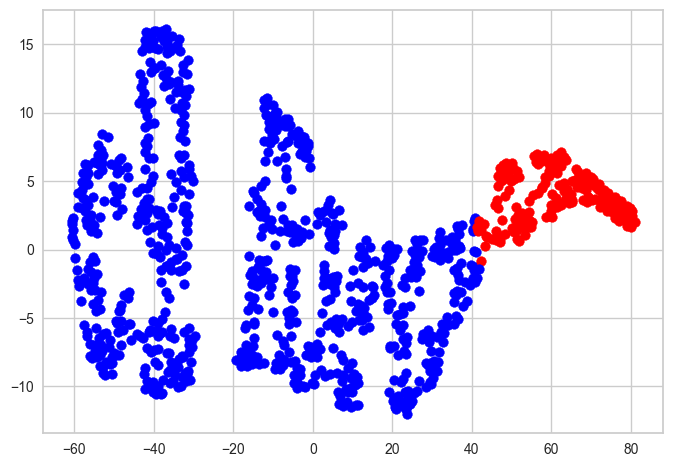

In [20]:
simple_print(clusters2_prediction)

In [21]:
def clusters_comparison(df, prediction):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'data' is your DataFrame and 'labels' are cluster labels
    data_with_labels = pd.concat([df, pd.Series(prediction, name='Cluster')], axis=1)

    num_features = len(df.columns)
    num_clusters = len(data_with_labels['Cluster'].unique())

    # Dynamically calculate the subplot grid dimensions
    rows = (num_features + 1) // 2  # Add 1 to handle odd numbers of features
    cols = 2

    plt.figure(figsize=(12, 8))
    for i, column in enumerate(df.columns):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x='Cluster', y=column, data=data_with_labels)
        plt.title(f'Cluster-wise Box Plot for {column}')

    plt.tight_layout()
    plt.show()


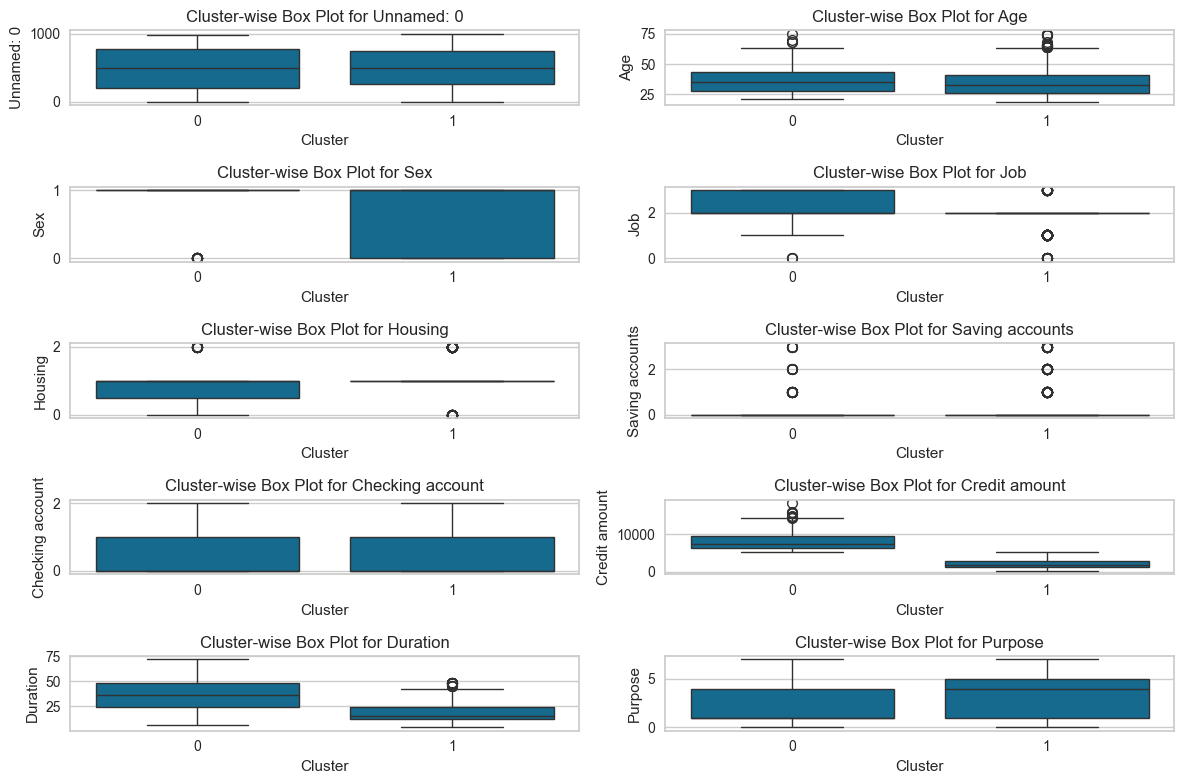

In [22]:
clusters_comparison(df, clusters2_prediction)

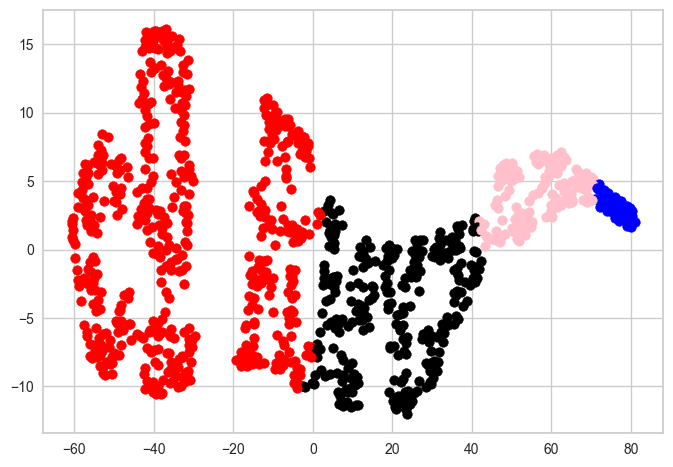

In [23]:
simple_print(clusters4_prediction)

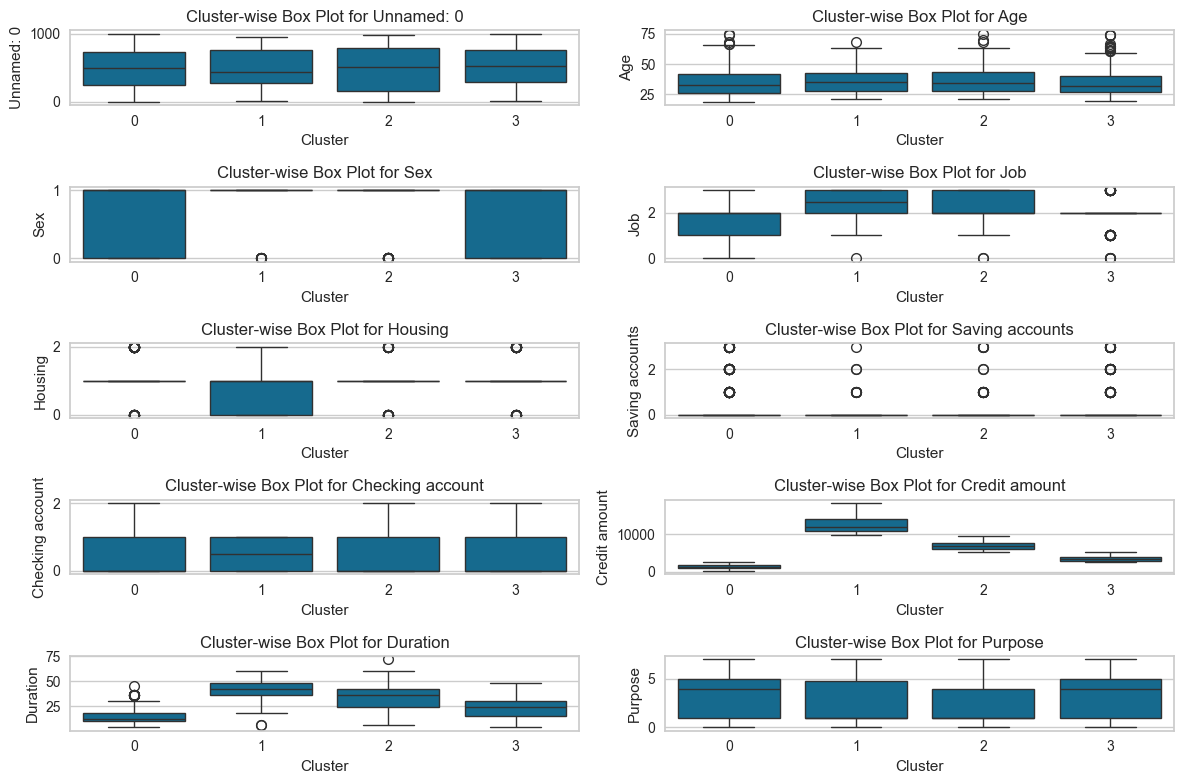

In [24]:
clusters_comparison(df, clusters4_prediction)

Agglomerative Clustering

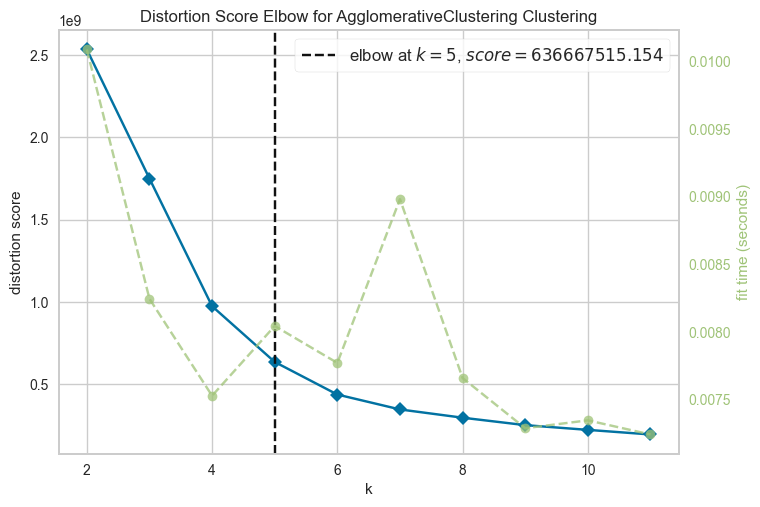

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df)
visualizer.show()

In [26]:
silhouette_list = []
for clusters in range(2, 10):
    agg = KMeans(n_clusters=clusters)
    agg_prediction = kmeans.fit_predict(df)
    silhouette_list.append(silhouette_score(df, agg_prediction))
print(silhouette_list)

[0.4584101581703659, 0.4376696730440573, 0.44006458830698786, 0.45609647253747587, 0.4584101581703659, 0.45684994592989525, 0.45778008034925266, 0.43305628889986403]


both the Elbow method and Silhouettes score provide us with the same results

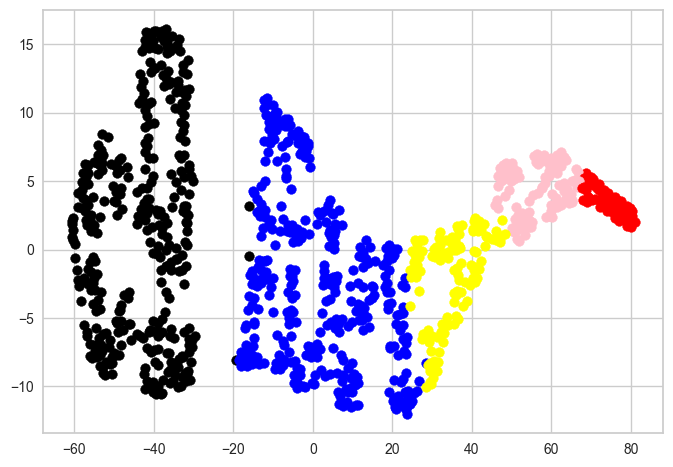

In [27]:
simple_print(AgglomerativeClustering(n_clusters=5).fit_predict(df))

DBSCAN

In [28]:
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming df is your DataFrame

# Extracting the features for clustering
df_scaled = StandardScaler().fit_transform(df)

# Define parameter grid for DBSCAN with smaller steps
param_grid = {'eps': np.arange(0.01, 3.01, 0.1),
              'min_samples': np.arange(1, 21, 1)}

best_score = -1  # Initialize with a low value

# Perform grid search
for params in ParameterGrid(param_grid):
    dbscan_clusters = DBSCAN(**params).fit_predict(df_scaled)
    
    # Check if there is more than one cluster
    unique_labels = np.unique(dbscan_clusters)
    if len(unique_labels) > 1 and len(unique_labels) < 1000:
        score = silhouette_score(df, dbscan_clusters)
        
        # Update best parameters if the score is higher
        if score > best_score:
            best_score = score
            best_params = params

# Print the best parameters and silhouette score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'eps': 2.91, 'min_samples': 2}
Best Silhouette Score: 0.5695317298523371


In [29]:
dbscan = DBSCAN(min_samples=2, eps=2.91)
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
dbscan_prediction = dbscan.fit_predict(df_scaled)
silhouette_score(df, dbscan_prediction)


0.5695317298523371

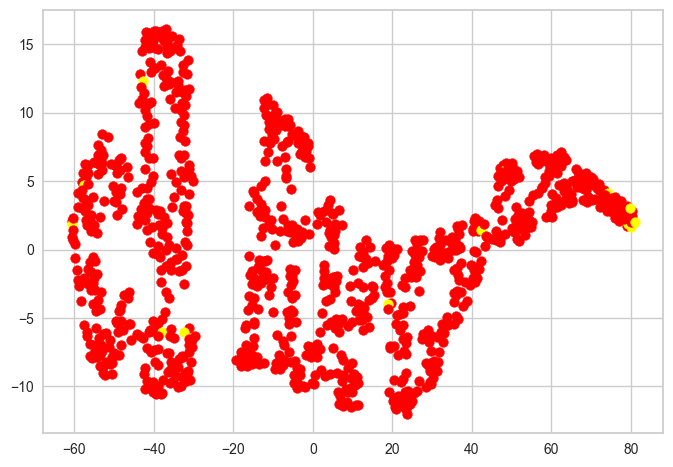

In [30]:
simple_print(dbscan_prediction)

In [31]:
print(dbscan_prediction)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

I want to commit this bunch of shit

In [32]:
print(df)

     Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0             0   67    1    2        1                0                 0   
1             1   22    0    2        1                0                 1   
2             2   49    1    1        1                0                 0   
3             3   45    1    2        0                0                 0   
4             4   53    1    2        0                0                 0   
5             5   35    1    1        0                0                 0   
6             6   53    1    2        1                2                 0   
7             7   35    1    3        2                0                 1   
8             8   61    1    1        1                3                 0   
9             9   28    1    3        1                0                 1   
10           10   25    0    2        2                0                 1   
11           11   24    0    2        2                0        

Explain your results